In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor  #for outlier detect
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")


In [52]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
data.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [54]:
data=data.rename(columns={"diagnosis":"target"})
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### EDA-Data visualization

B    357
M    212
Name: target, dtype: int64


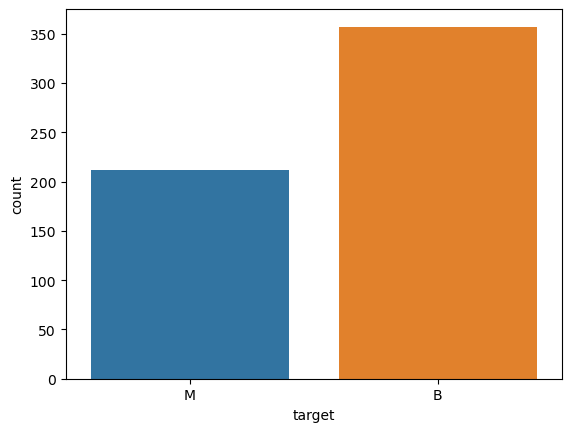

In [55]:
sns.countplot(data["target"])
print(data.target.value_counts())

In [56]:
data["target"]=[1 if i.strip()=="M" else 0 for i in data.target]

In [57]:
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
print("data shape",data.shape)

data shape (569, 31)


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [60]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [61]:
"""vernin standardize edilmesi lazım.büyük sayılar küçük sayılara baskın gelebilir."""

'vernin standardize edilmesi lazım.büyük sayılar küçük sayılara baskın gelebilir.'

In [62]:
data.isnull().sum()

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [63]:
## EDA

In [64]:
##correlation 
corr_matrix=data.corr()
corr_matrix # data iyi anlamak için görselleştirilir

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


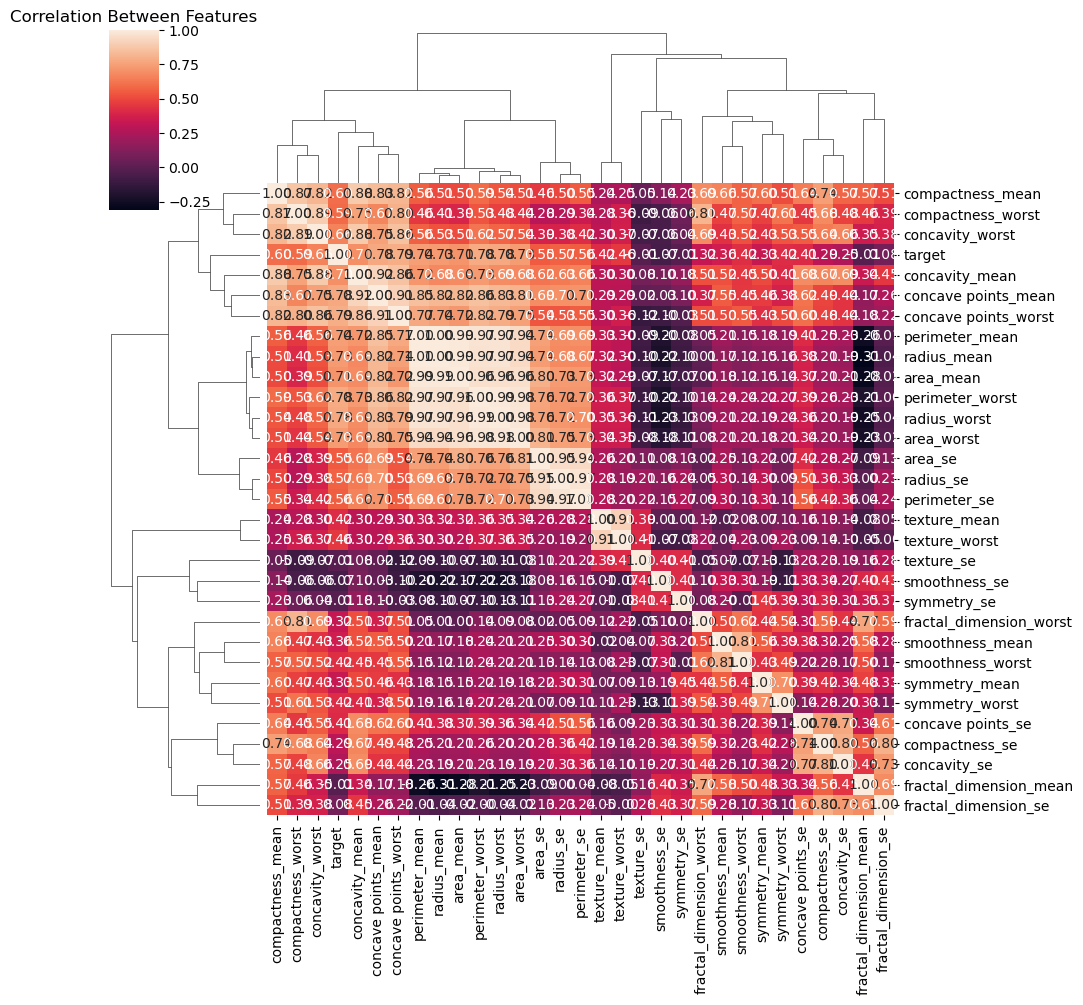

In [65]:
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.savefig("corelasyon.png")

sonuç:birbirleriyle alakalı olanların modele katkıları aynıdır
radius ve alan 0.99 ilişkili. machine learning de ikisinin de katkısı aynı.
machine learningd çeşitliliğe gitmemiz gerekir.yani birbirleri arasında ilişki olmayan featurelar daha çok katkı sağlar.
örneğin symetry worst-dimension-se arasında 0.11 lik korelasyon var. bunları kulla<nırsak daha iyi bir model olabilir.
feature engineering ile ortadan kaldırabiliriz.

In [66]:
#correlated features için subsample çizelim.

Text(0.5, 1.0, 'Correlation between features with corr threshold 0.75')

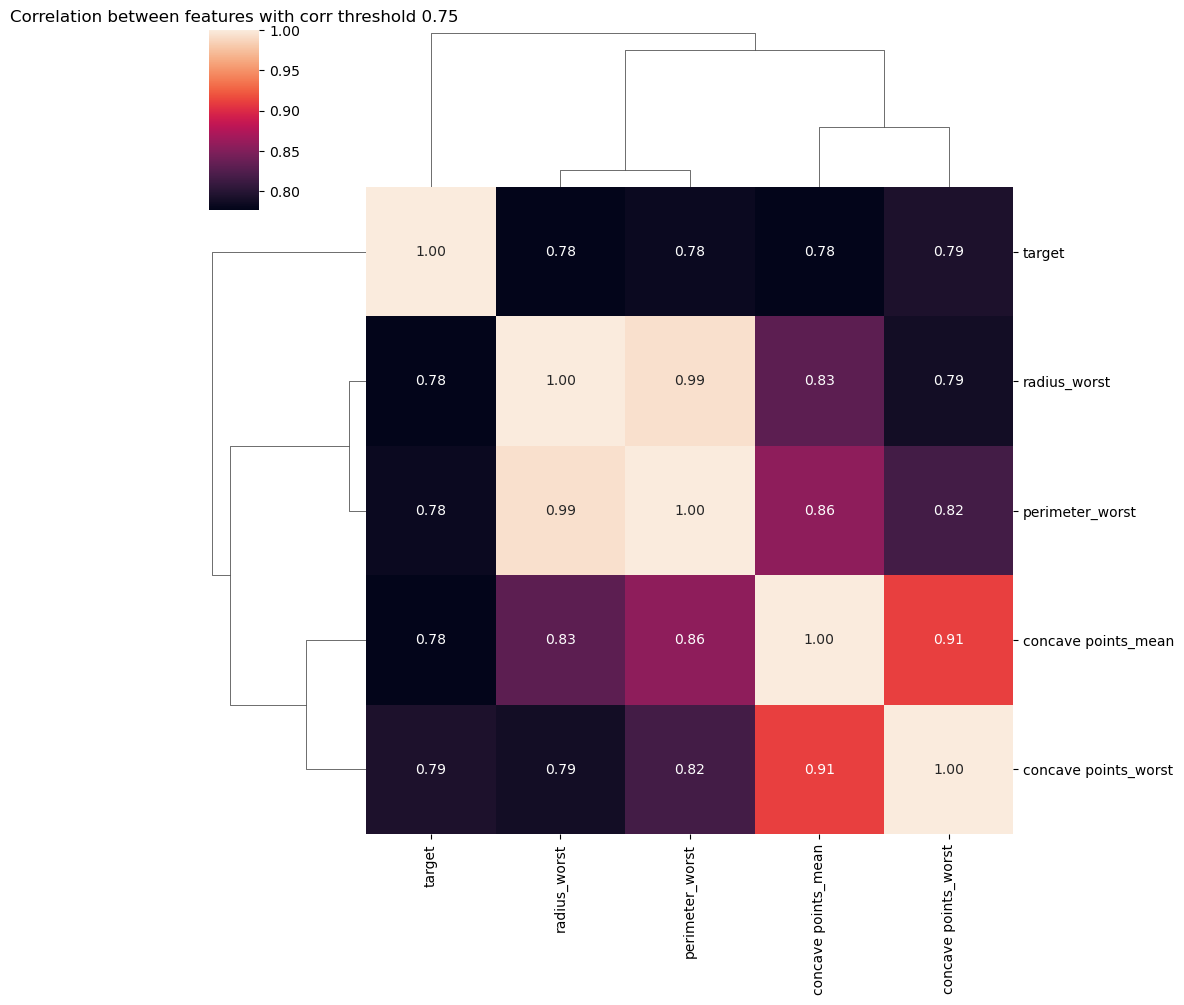

In [67]:
threshold=0.75 # 0.75 den büyük ilişkilere bakalım.
filtre=np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation between features with corr threshold 0.75")

"""there are some corelated features
çok korele olmuşlar varsa model eğitilirken bunlar kaldırılır.ya da regülarizasyon yap"""

In [68]:
#box plot

In [69]:
data_melted=pd.melt(data,id_vars="target",
                    var_name="features",value_name="value")


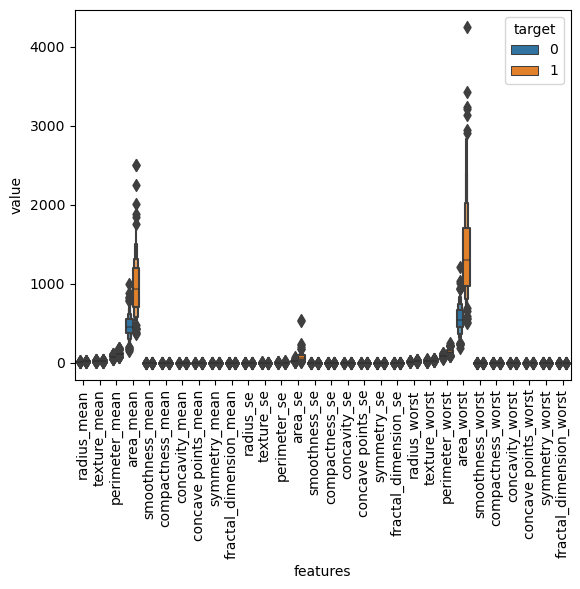

In [70]:
plt.figure()
sns.boxenplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

boxplottan anlam çıkarabilmek için veriyi standardize edelim ya da normalize.
standardize edince tekrar çizdir.

In [71]:
#pairplot

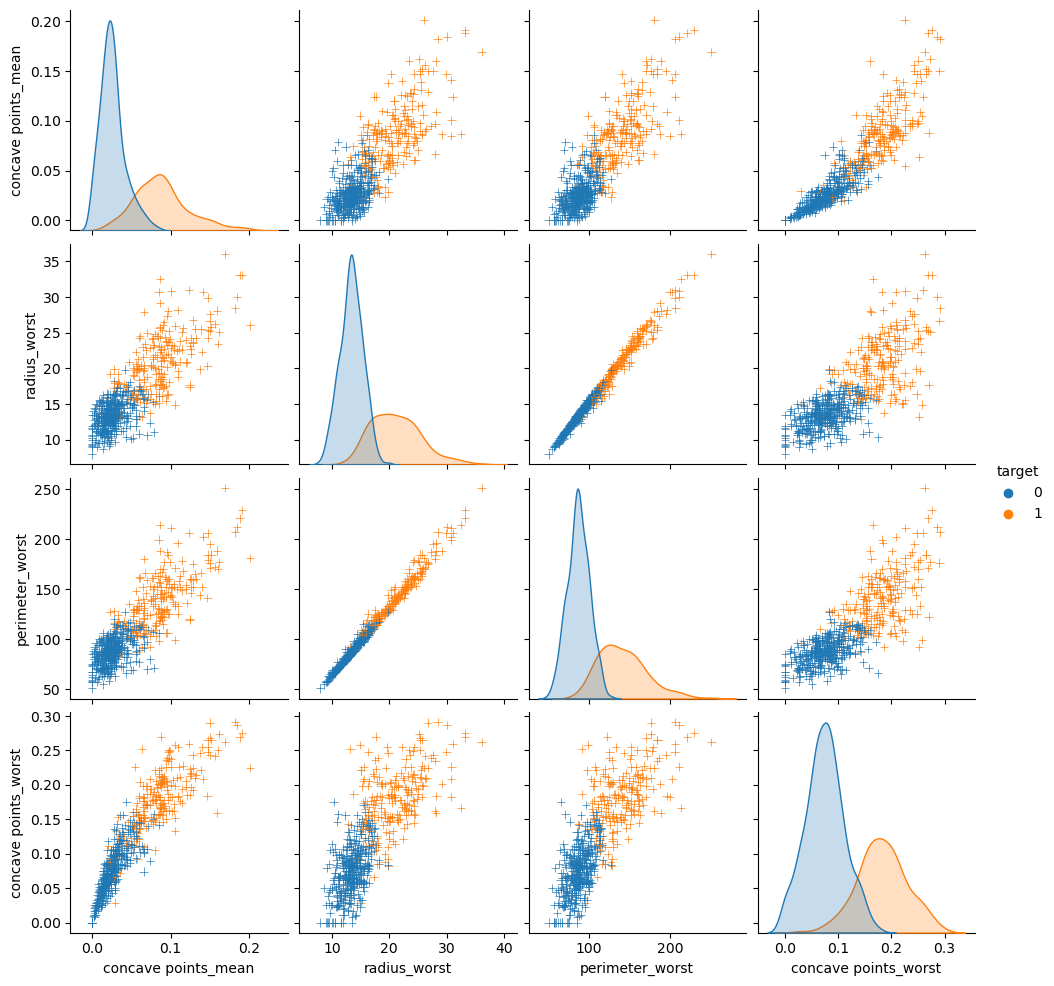

In [72]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

*maviler iyi huylu kanser hücreleri 0 olanlar.
pozitif ya da negatif skewness(çarpıklık) var.pozitif skewnesslık örn: gelir dağılımı
    datada skewnesslık varsa düzeltmek gerekir. 

In [73]:
#outlier detection


outlier veri setinde bulunan aykırı değerlere denir.ayıklanmazsa modeli yanlış yönlendirir
DENSİTY based outlier detection system. Bunun içindeki local outlier factor kullan.
local outlier factor(lof). çünkü skew dataları tespit etmede lof etkili bir yöntem.

In [74]:
## outlier implementation. veri setinde outlier varsa detect et ve çıkart.

In [75]:
y=data.target
x=data.drop(["target"],axis=1)
columns=x.columns.tolist()

clf=LocalOutlierFactor()  # k default 20 dir. iyi.
y_pred=clf.fit_predict(x)
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

* local outlier sklearn sitesine bakarsan fit predict te ne return ediyor bakabilirsin
* -1= outlier için. 1= inlier yanş normal
* y target, buradaki y_pred outlier mı değil mi onu söylemek için. machine learningdeki gibi bir ilişki yok.

In [76]:
#outlier factor değerleri için:
X_score=clf.negative_outlier_factor_ # burda negatifle çarpılmış hali
outlier_score=pd.DataFrame()
outlier_score["score"]=X_score
outlier_score

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936
...,...
564,-1.330082
565,-0.997906
566,-0.997441
567,-0.993730


In [77]:
# burda -2 den küçük değerleri çıkarabilliriz.

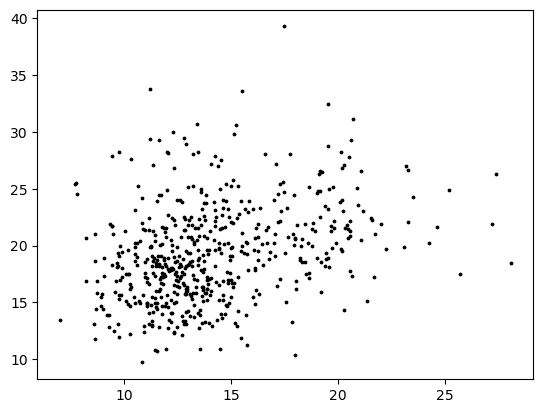

In [78]:

plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

#outlierları burada tam gözlemleyemiyoruz bunun için:

In [79]:
radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())  #-3 ile -0.9 arasındakileri standardize ettik ve radius eeşitledik

In [80]:
outlier_score["radius"]=radius
outlier_score # yani 0 ile 1 arasına normalize ettik ve daha iyi görselleştireceğiz.

,score,radius
0,-1.422440,0.217679
1,-1.066782,0.055159
2,-0.978948,0.015022
3,-1.596933,0.297414
4,-1.069936,0.056600
...,...,...
564,-1.330082,0.175475
565,-0.997906,0.023685
566,-0.997441,0.023473
567,-0.993730,0.021777


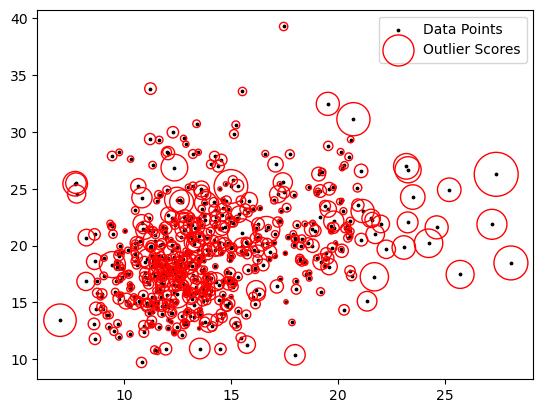

In [81]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.legend()
plt.show()

* kırmızı çemberler outlier score. en büyük olan -3 olandı. outlier olmaya en yakın olan nokta yani
* aslında en üstteki noktacıkta outlier olmaya yakın ama küçük çember ve outlier değil gibi gözüküyor. yani grafiği 30 boyutlu görebilseydik büyük olan çemberler daha dışarda olurdu.
* çok büyük olanlar az olduğu için -2.5 gibi  bir threshold konabilir.

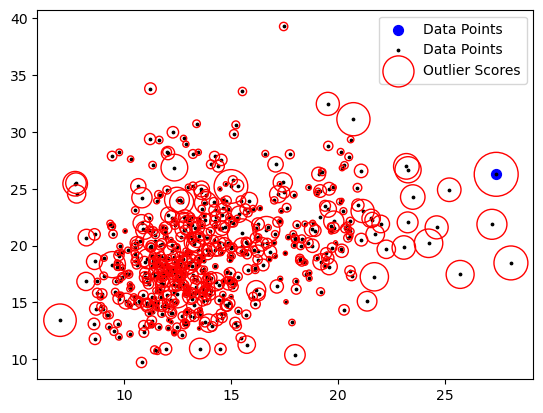

In [82]:
threshold=-2.5
filtre=outlier_score["score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Data Points")

plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius

plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.legend()
plt.show()

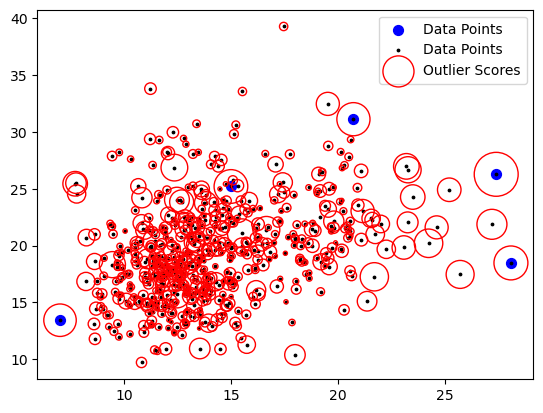

In [83]:
# mesela threshold -2 olursa kaç parçacık çıkarmak gerekir
threshold=-2
filtre=outlier_score["score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Data Points")

plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius

plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.legend()
plt.show()

* 5 tane çıkarmak yeterli gibi.model eğittikten sonra tekrar tune edilebilir.
* görselleştirme için 0 ve 1. columnları kullandık. farklı olanlar da denenebilir. hangisi? outlier dağılımını daha iyi görselleştirilebilir.

In [84]:
## şimdi outlierları çıkaralım

In [85]:
x=x.drop(outlier_index)
y=y.drop(outlier_index).values # converting array

In [86]:
## train- test split

In [87]:
test_size=0.3
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=test_size,random_state=42)

### standardization

* veri setindeki değerlerde çok fazla farklılık varsa standardize etmek gerek ya da normalize

In [89]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

* burada x testi x traine e göre standardize ettil. fit transform yanlış olur. eğer x test için de aynısı yapılırsa x test için de scaler belirlenip uygulanmış olur.algoritmayı x train ile eğiteceğiz o yüzden x test i de ona göre standardize ettik

In [90]:
X_train_df=pd.DataFrame(X_train,columns=columns)

In [91]:
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.341501,-0.763712,-0.333129,-0.402012,-0.656703,-0.189561,-0.507837,-0.463354,-0.106630,-0.094194,...,-0.369298,-0.611776,-0.299193,-0.418930,-0.059154,-0.020998,-0.326089,-0.216192,1.085642,-0.191899
1,-1.038477,-0.128318,-1.040263,-0.926658,0.741259,-0.727209,-0.832293,-0.799738,-1.186957,0.418254,...,-1.096715,-0.166392,-1.108509,-0.917309,0.368999,-0.998500,-0.930489,-0.767009,-1.147810,-0.349567
2,-0.948825,0.667695,-0.959412,-0.851161,-0.570159,-0.904779,-0.667753,-0.896436,0.762011,-0.456418,...,-0.735133,1.061690,-0.712278,-0.705442,-0.097307,-0.574743,-0.405048,-0.620257,0.109342,-0.452395
3,-1.276490,-0.156663,-1.265222,-1.059958,-0.468959,-0.806973,-0.750960,-0.868147,1.572256,0.155712,...,-1.079699,0.010452,-1.104832,-0.899111,-0.389808,-0.674833,-0.719916,-0.762102,0.458737,0.040033
4,-0.156413,-1.132193,-0.177292,-0.242466,0.112421,-0.451643,-0.286702,-0.027957,0.283893,-0.752655,...,-0.235300,-1.030961,-0.221663,-0.293779,0.483456,-0.524698,-0.180766,0.207042,0.129403,-0.682613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.902065,1.267658,0.942895,0.828354,0.762197,1.479979,0.994630,0.785486,0.437183,0.259606,...,1.510926,1.353155,1.368777,1.506994,1.098132,3.128584,1.842136,1.143983,0.691110,2.819795
390,2.368317,0.122060,2.559920,2.537655,2.541930,3.261378,4.207956,3.430785,2.732877,1.034596,...,2.591416,0.401801,3.060344,2.767795,1.589872,2.870560,3.315716,2.694306,1.931545,0.762680
391,1.113182,1.258209,0.984787,1.033317,-0.532471,-0.660929,-0.407264,-0.037473,-0.982571,-1.112071,...,1.000458,1.495612,0.863146,0.836671,-0.046437,-0.503250,-0.330933,-0.026044,-0.661332,-0.289014
392,-0.017596,-0.825126,-0.088062,-0.123912,-1.152934,-0.935545,-0.858529,-0.575482,-0.796433,-1.005369,...,-0.277839,-1.022774,-0.318805,-0.335186,-1.237636,-1.016048,-1.035267,-0.508162,-1.276535,-0.996236


In [92]:
X_train_df_describe=X_train_df.describe()
X_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,...,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-6.148494e-16,7.583471e-16,5.252426e-16,2.076737e-16,-8.483062e-16,1.831586e-18,7.889910e-17,7.100919e-17,1.961206e-16,2.846003e-17,...,4.336633e-16,1.393414e-16,4.226737e-16,-1.301835e-16,-1.300426e-16,-4.423985e-17,6.142858e-17,-3.719529e-17,3.064032e-16,-1.335649e-16
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,...,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,-1.836963e+00,-2.230550e+00,-1.831181e+00,-1.385244e+00,-2.225659e+00,-1.550299e+00,-1.119268e+00,-1.257509e+00,-2.336629e+00,-1.833710e+00,...,-1.542523e+00,-2.216469e+00,-1.524965e+00,-1.164641e+00,-2.603912e+00,-1.499664e+00,-1.338509e+00,-1.768048e+00,-1.985354e+00,-1.576067e+00
25%,-6.878203e-01,-7.064321e-01,-6.859631e-01,-6.695699e-01,-7.203895e-01,-8.055489e-01,-7.617669e-01,-7.488177e-01,-7.033648e-01,-7.263306e-01,...,-6.883402e-01,-7.096130e-01,-6.975689e-01,-6.600885e-01,-7.681511e-01,-7.169158e-01,-7.730797e-01,-7.682740e-01,-6.609143e-01,-6.877546e-01
50%,-2.344969e-01,-8.462042e-02,-2.462037e-01,-3.130969e-01,-2.751526e-02,-2.382739e-01,-3.461710e-01,-3.890303e-01,-3.181028e-02,-1.664985e-01,...,-2.714581e-01,-7.796968e-02,-2.850964e-01,-3.414068e-01,-5.915434e-02,-2.559498e-01,-2.185497e-01,-2.261594e-01,-1.355684e-01,-2.550236e-01
75%,4.892299e-01,5.673075e-01,5.166462e-01,3.956467e-01,6.034173e-01,5.251829e-01,5.573583e-01,7.153421e-01,5.457631e-01,4.631811e-01,...,5.506078e-01,6.453704e-01,5.743235e-01,4.040255e-01,5.777770e-01,6.269862e-01,5.878742e-01,7.038810e-01,4.792160e-01,4.470576e-01
max,3.799864e+00,4.754055e+00,3.787350e+00,4.722942e+00,4.691567e+00,3.449393e+00,4.212954e+00,3.916845e+00,4.499358e+00,4.832329e+00,...,3.597463e+00,3.927214e+00,3.749841e+00,4.390681e+00,3.815423e+00,4.418704e+00,4.726322e+00,2.694306e+00,6.249663e+00,5.053430e+00


In [93]:
# bazı değerler neden 1.11 falan ?

In [94]:
# standardize sonrası boxplot

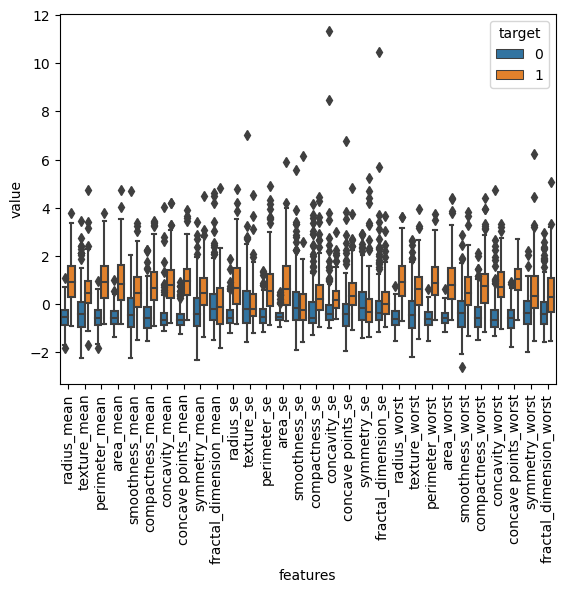

In [95]:
X_train_df["target"]=Y_train
data_melted=pd.melt(X_train_df,id_vars="target",
                    var_name="features",value_name="value")

plt.figure()
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

In [96]:
 # pairplot

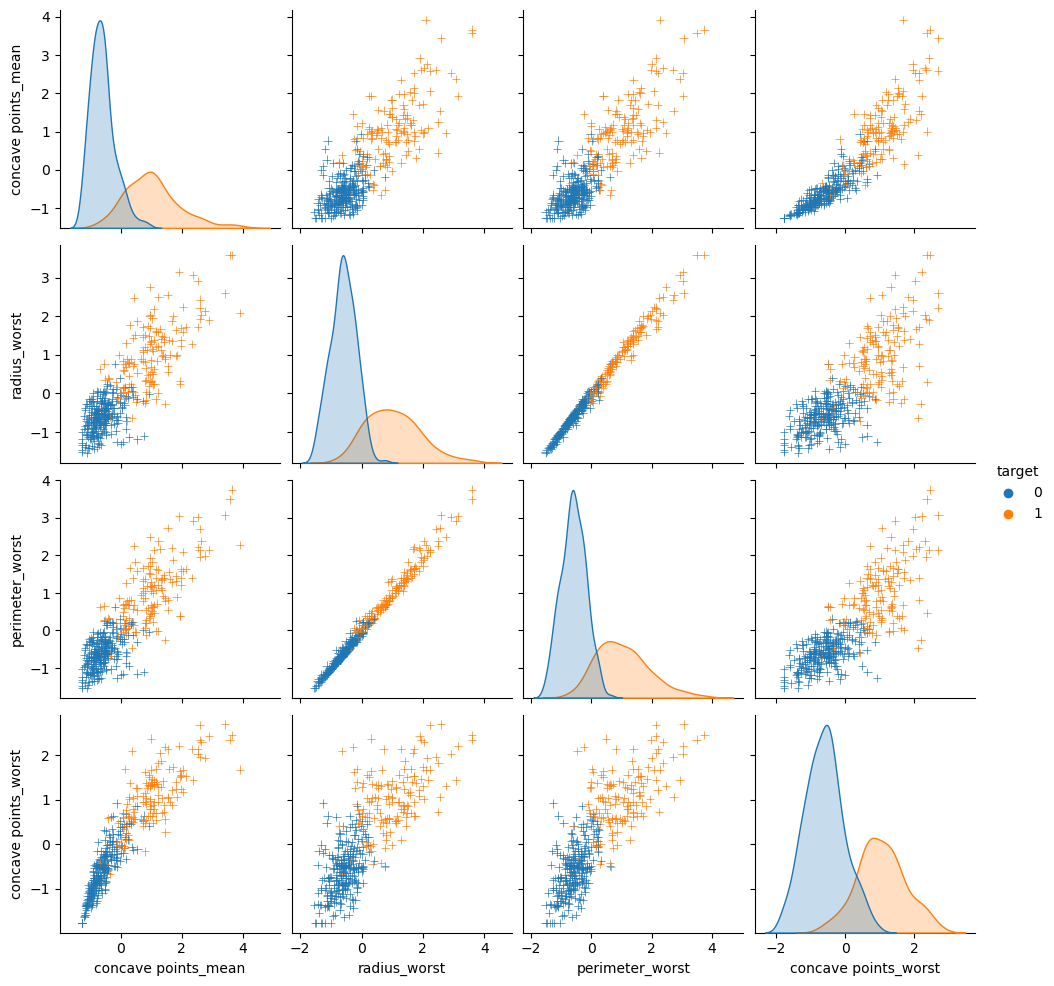

In [97]:
sns.pairplot(X_train_df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

### basic knn 

In [99]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
acc=accuracy_score(Y_test,y_pred)
score=knn.score
print("score: ",score)
print("Basic KNN accuracy: ",acc)
print("Confusion Matrix: ",cm)

score:  <bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=2)>
Basic KNN accuracy:  0.9529411764705882
Confusion Matrix:  [[107   0]
 [  8  55]]


In [100]:
cm

array([[107,   0],
       [  8,  55]], dtype=int64)

* gerçekte 107 tane iyi kanser hücresinin hepsi doğru tahmin edilmiş. yanloş tahmin yok
* 63 tane kötü huylu kanser hücresinin 55 tanesi doğru tahmin 8 tanesi yanlış tahmin edilmiş.

### model tuning- best params

In [104]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):
    k_range=list(range(1,31))
    weight_options=["uniform","distance"]
    print()
    param_grid=dict(n_neighbors=k_range,weights=weight_options)
    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    grid.fit(x_train,y_train)
    
    print("Best training score : {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    
    knn=KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)
    
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    print("Test score: {}, Train score: {}".format(acc_test,acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid


grid=KNN_Best_Params(X_train,X_test,Y_train,Y_test)



Best training score : 0.9692948717948718 with parameters: {'n_neighbors': 4, 'weights': 'distance'}

Test score: 0.9470588235294117, Train score: 1.0

CM Test:  [[104   3]
 [  6  57]]
CM Train:  [[249   0]
 [  0 145]]


* overfitting problem var

## PCA 

* amaç yapılan algoritmayı daha iyi açıklamak.)
* veri boyutu fazla ise pca ile azaltabiliriz.
* feature selection da yapılabilir.

In [106]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



Best training score : 0.9593589743589742 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test score: 0.9235294117647059, Train score: 0.9593908629441624

CM Test:  [[102   5]
 [  8  55]]
CM Train:  [[243   6]
 [ 10 135]]


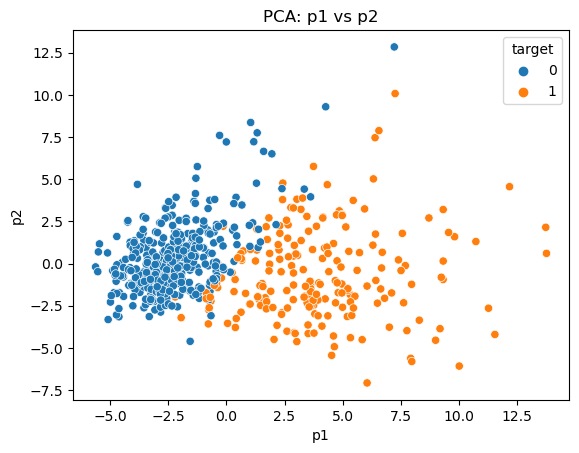

In [110]:
caler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


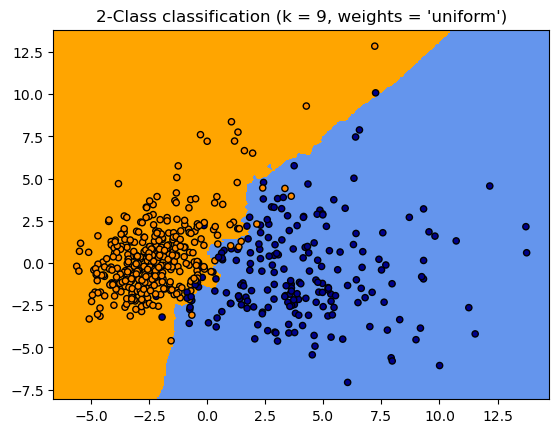

In [116]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.savefig("PCA.png")

* yanlış sınıflandırılanlar var

## NCA ( neighboorhood component analysis
######

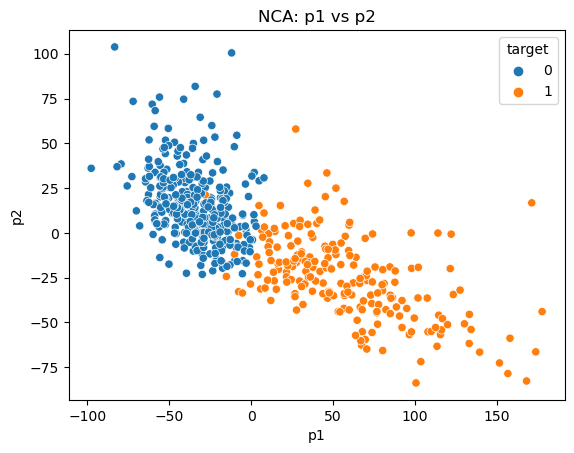

In [119]:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
X_reduced_nca=nca.transform(x_scaled)
nca_data=pd.DataFrame(x_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA: p1 vs p2")
plt.savefig("NCA.png")

* pca e göre daha iyi bir analiz gerçekleşti. daha az iç içe geçme söz konusu

In [120]:
 X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score : 0.9949358974358974 with parameters: {'n_neighbors': 7, 'weights': 'distance'}

Test score: 0.9705882352941176, Train score: 1.0

CM Test:  [[107   0]
 [  5  58]]
CM Train:  [[249   0]
 [  0 145]]


Text(0.5, 1.0, "2-Class classification (k = 7, weights = 'distance')")

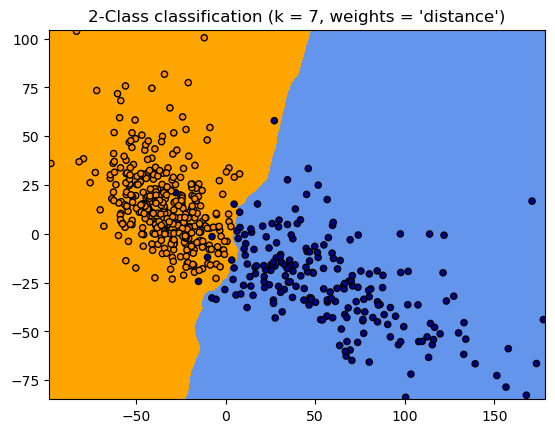

In [122]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

In [124]:
# yanlış kararları bulmak için

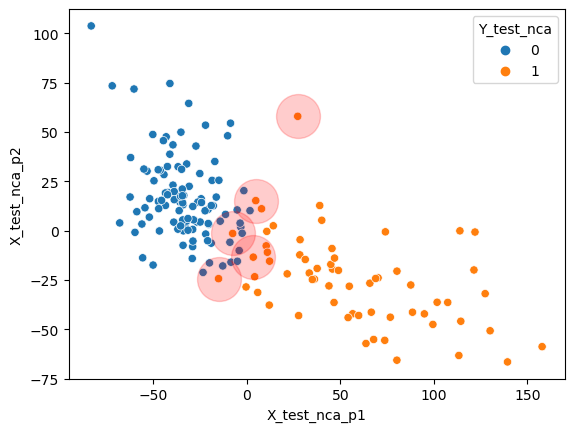

In [123]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)


* yanlış sınıflandırılan noktalar

sonuç:
  * dataset ve problem desc yapıldı
  * outlier tespit ettik ve çıkardık
  * knn ile train ettik. 
  * pca ile 30 veriyi 2 boyuta indirgedik. 0.95 e düştü.
  * nca  ile veriyi 2 boyuta indirgedik 0.99 başarı sağlandı.
  * train test size ayarlayarak  sonuçları incele.
  * hyper parameter değiştirilip daha iyi sonuç sağlanabilir.